# Éléments d'un signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ugen = [2, 4, 6, 8, 10]
Uosc = [1.97, 3.90, 5.75, 7.8, 9.5]
Uvm = [0.675, 1.357, 2.043, 2.702, 3.392]
#Incertitudes : ±1% pour le VM et ±1% pour l'oscillo

In [3]:
#Acquisition - traitement

t, u = np.loadtxt("./.csv", dtype=float, delimiter=',', skiprows=2, unpack=True)

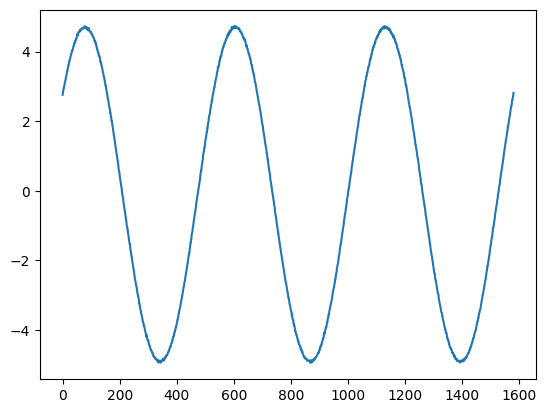

In [4]:
#Période

plt.plot(u[:1581])

plt.show()

In [5]:
def rase_periode(s):
    T = [] 
    compteur = 0

    for i in range(1, len(s), 5):
        if (s[i-5] - s[0]) * (s[i] - s[0]) <= 0:
            compteur += 1
            T.append(i)
    
    if compteur%2 == 1 :
        return T[-2]
    else :
        return T[-1]
    
print(rase_periode(u))


    

1581


In [6]:
def val_max(s):
    return max(s)

def tension_cac(s):
    return max(s)-min(s)

print(val_max(u))

4.72281402


In [7]:
def val_eff(s):
    #valeur efficace
    s = s[:rase_periode(s)]
    
    return np.sqrt(np.mean( s**2))
    
val_eff(u)

3.4051783868282164

In [8]:
def val_eff_ctrd(s):
    #valeur efficace centrée
    s = s[:rase_periode(s)]
    
    return np.sqrt( np.mean( s**2 ) - np.mean(s)**2 )

val_eff_ctrd(u)

3.4034582808974094

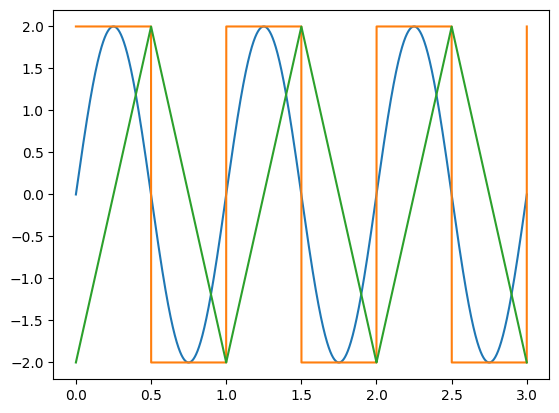

In [9]:
# ===== Simulation des signaux =========


def sin(t):
    return 2*np.sin(2 * np.pi * t)

from scipy.signal import square, sawtooth


def carre(t):
    return 2*square(2 * np.pi * t)

def triangle(t):
    return 2*sawtooth(2 * np.pi * t, .5)


    

x = np.linspace(0, 3, 10_000)

s_sin = sin(x)
s_sqr = carre(x)
s_trg = triangle(x)

plt.plot(x, s_sin)
plt.plot(x, s_sqr)
plt.plot(x, s_trg)
plt.show()


In [10]:
def print_info(s):
    print(f"\t-Valeur max : {val_max(s)}")
    print(f"\t-Valeur efficace : {val_eff(s)}")
    print(f"\t-Valeur efficace centrée : {val_eff_ctrd(s)}")
    
print("Signal sinusoidal :")
print_info(s_sin)

print("Signal carré :")
print_info(s_sqr)

print("Signal triangulaire :")
print_info(s_trg)

Signal sinusoidal :
	-Valeur max : 1.9999997778894851
	-Valeur efficace : 1.413916646636206
	-Valeur efficace centrée : 1.390816383725635
Signal carré :
	-Valeur max : 2.0
	-Valeur efficace : 2.0
	-Valeur efficace centrée : 1.959650541143661
Signal triangulaire :
	-Valeur max : 1.9987998799879998
	-Valeur efficace : 1.1555595648294936
	-Valeur efficace centrée : 1.1555585969681916


In [20]:
# ===== RENDU SUR LES SIGNAUX EXPERIMENTAUX =====

# acquisition

tc, creneau = np.loadtxt("./TP3Crenau.csv", dtype=float, delimiter=',', skiprows=2, unpack=True)
tt, triangle = np.loadtxt("./TP3Triangle.csv", dtype=float, delimiter=',', skiprows=2, unpack=True)
ts, sinusoidal = np.loadtxt("./TP3Sinusoide.csv", dtype=float, delimiter=',', skiprows=2, unpack=True)


# traitement

Tc = rase_periode(creneau)
Tt = rase_periode(triangle)
Ts = rase_periode(sinusoidal)

creneau, tc = creneau[:Tc], tc[:Tc]
triangle, tt = triangle[:Tt], tt[:Tt]
sinusoidal, ts = sinusoidal[:Ts], ts[:Ts]


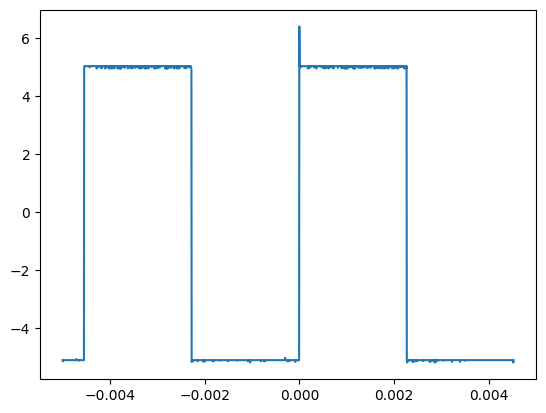

In [23]:
plt.plot(tc, creneau)

plt.show()

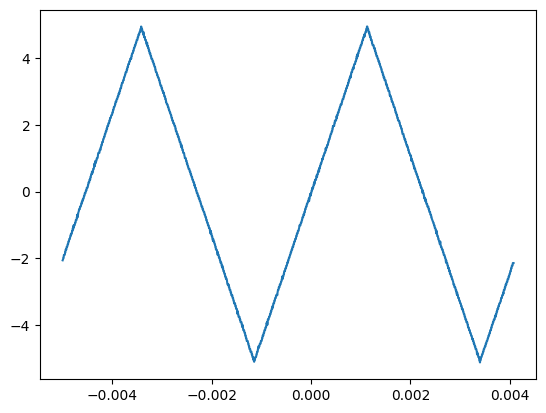

In [26]:
plt.plot(tt, triangle)

plt.show()

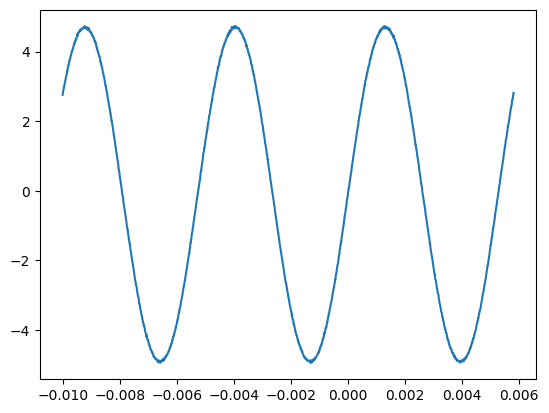

In [27]:
plt.plot(ts, sinusoidal)

plt.show()

In [28]:
# données caractéristiques :

print("Signal sinusoidal :")
print_info(sinusoidal)

print("Signal carré :")
print_info(creneau)

print("Signal triangulaire :")
print_info(triangle)

Signal sinusoidal :
	-Valeur max : 4.72281402
	-Valeur efficace : 3.4032099721744715
	-Valeur efficace centrée : 3.401663770414886
Signal carré :
	-Valeur max : 6.386758718
	-Valeur efficace : 5.063362694899764
	-Valeur efficace centrée : 5.056418206529919
Signal triangulaire :
	-Valeur max : 4.939522561
	-Valeur efficace : 2.7208718232117945
	-Valeur efficace centrée : 2.6675432592141073
